In [1]:
import numpy as np
import matplotlib.pyplot as plt
from To_sim.for_multi import get_sol,get_sol_MF,get_sol_Last,get_sol_MF_Last 
import glob
import pickle

In [2]:
N = 1000
np.random.seed(0)
theta_random = np.random.uniform(0,2*np.pi,N)
omega = 1
K,b = 5,0.5
db = 0.05
t_end,dt = 400,0.1
t = np.arange(0, t_end+dt/2, dt)
Ds = np.arange(0,4+db/2,db)

b = 1.1
D = 0.7

In [4]:
theta_s,rabs,chi,sigma_phi = get_sol_MF(theta_random,t,D,b,omega,N,K)

In [6]:
np.mean(np.abs(rabs[len(t)//2:]))

0.9063601758874988

In [11]:
np.var(rabs[len(t)//2:]) * N

329.7579472407457

In [14]:
np.abs(sigma_phi)

0.7013636851337111

In [7]:
np.abs(np.mean(rabs[len(t)//2:]))


0.7013636851337111

/opt/anaconda3/envs/Kuramoto/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/Kuramoto/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


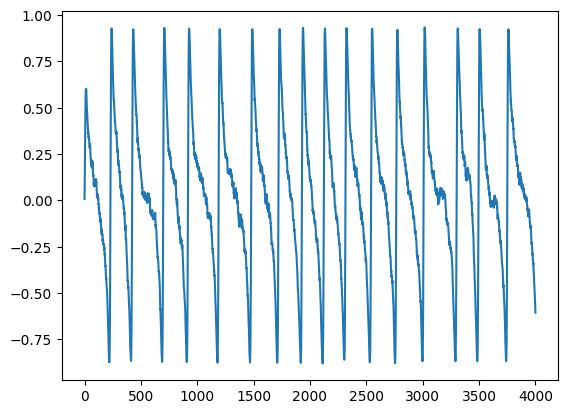

In [5]:
plt.plot(rabs)

# Draw

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [3]:
SF = np.load('DATA/SF_threshold.npz')
MF = np.load('DATA/MF_threshold.npz')
ER = np.load('DATA/ER_threshold.npz')

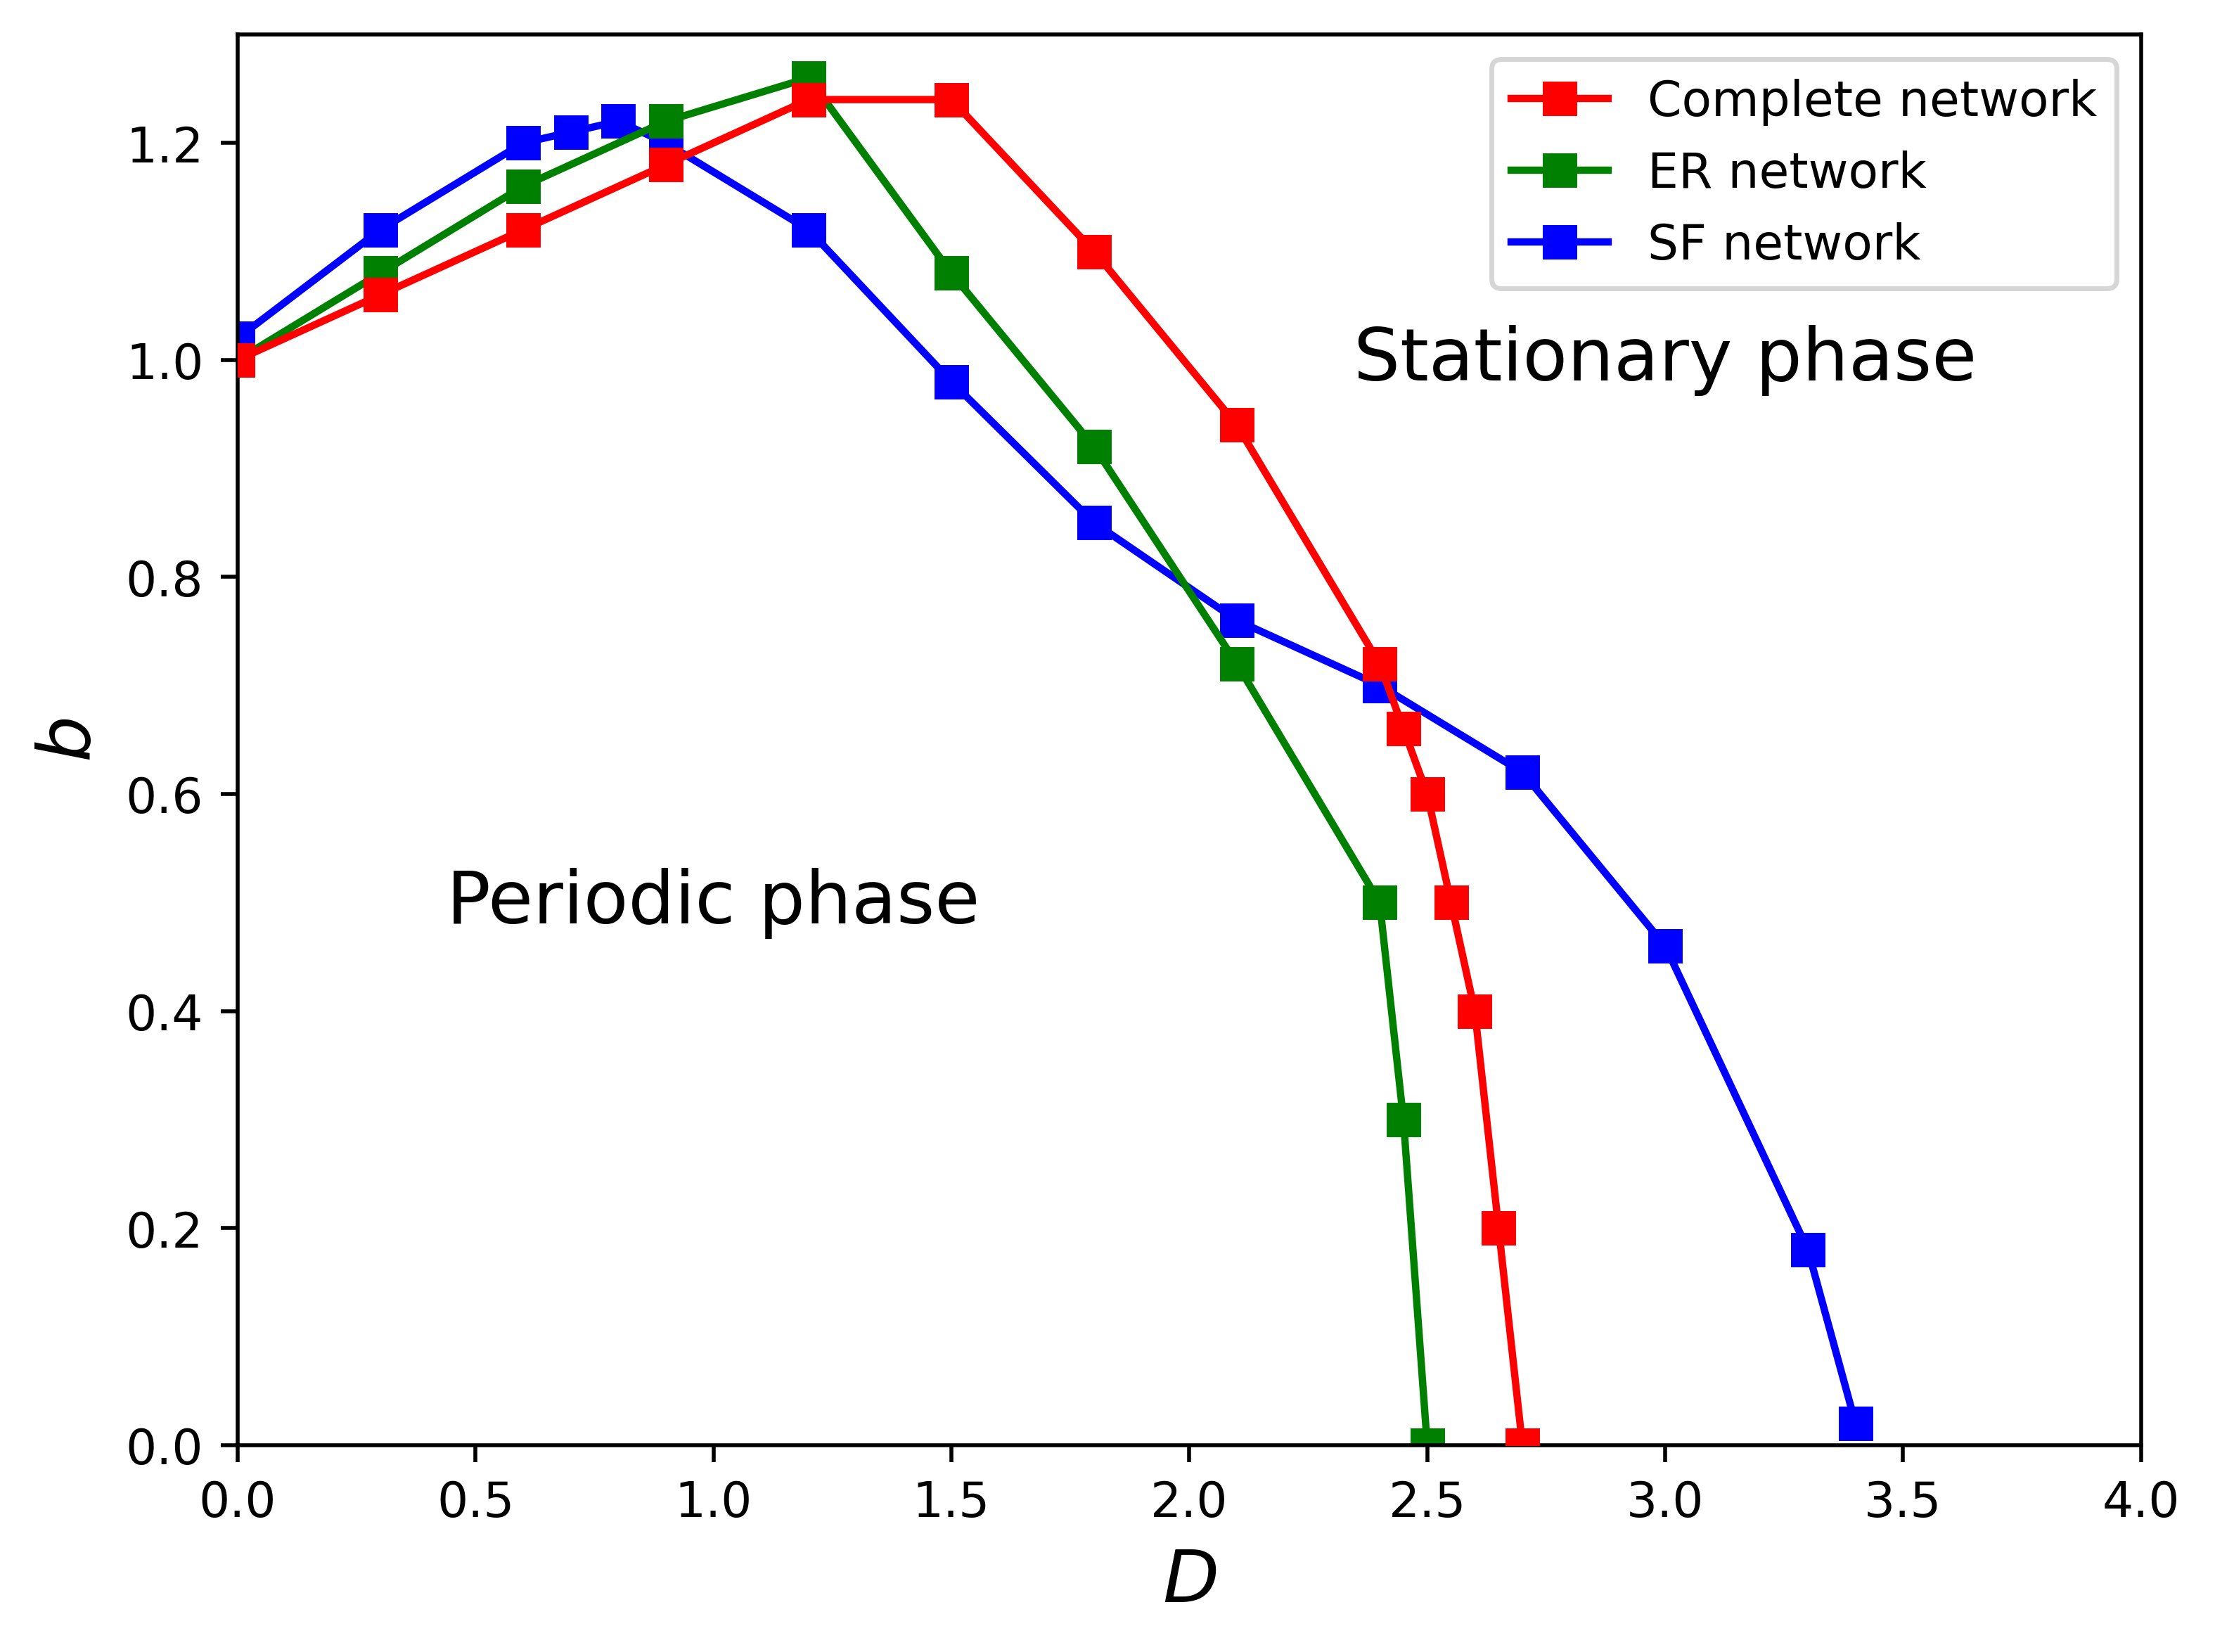

In [17]:
plt.figure(dpi=500)
plt.plot(MF['Ds'],MF['bs'],'rs-',label='Complete network',zorder=3)
plt.plot(ER['Ds'],ER['bs'],'gs-',label='ER network',zorder=2)
plt.plot(SF['Ds'],SF['bs'],'bs-',label='SF network',zorder=1)
plt.xlim(0,4)
plt.ylim(0,1.3)
# plt.grid()
plt.xlabel(r'$D$',fontsize=15)
plt.ylabel(r'$b$',fontsize=15)
plt.text(1.0,0.5,'Periodic phase',fontsize=15,horizontalalignment='center',
        verticalalignment='center')
plt.text(3.0,1.0,'Stationary phase',fontsize=15,horizontalalignment='center',
        verticalalignment='center')

plt.legend()
plt.tight_layout()

(0.0, 3.0)

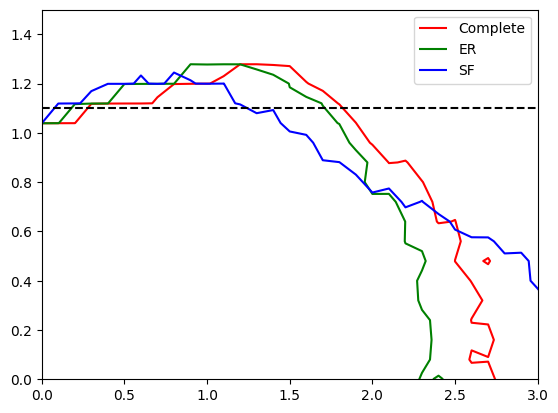

In [6]:
AR_MF = np.load('DATA/MF N = 1000 db=0.04 K = 5 000.npz')

cs_mf = plt.contour(AR_MF['Ds'],AR_MF['bs'],AR_MF['D_chiij'].T,levels=[5],colors='red')
h_mf,_ = cs_mf.legend_elements()

AR_ER = np.load('DATA/ER N = 1000 mk = 6.0 db=0.04 K = 5 000.npz')


cs_er = plt.contour(AR_ER['Ds'],AR_ER['bs'],AR_ER['D_chiij'].T,levels=[5],colors='green')
h_er,_ = cs_er.legend_elements()


AR_SF = np.load('DATA/SF N = 1000 m = 3 db=0.04 000.npz')
cs_sf = plt.contour(AR_SF['Ds'],AR_SF['bs'],AR_SF['D_chiij'].T,levels=[5],colors='blue')
h_sf,_ = cs_sf.legend_elements()

plt.legend([h_mf[0],h_er[0],h_sf[0]],['Complete','ER','SF'])
plt.hlines(1.1,0,3.0,ls='--',color='black')
plt.ylim(0,1.5)
plt.xlim(0,3)

Text(0.5, 1.0, '$\\tilde{\\chi}$')

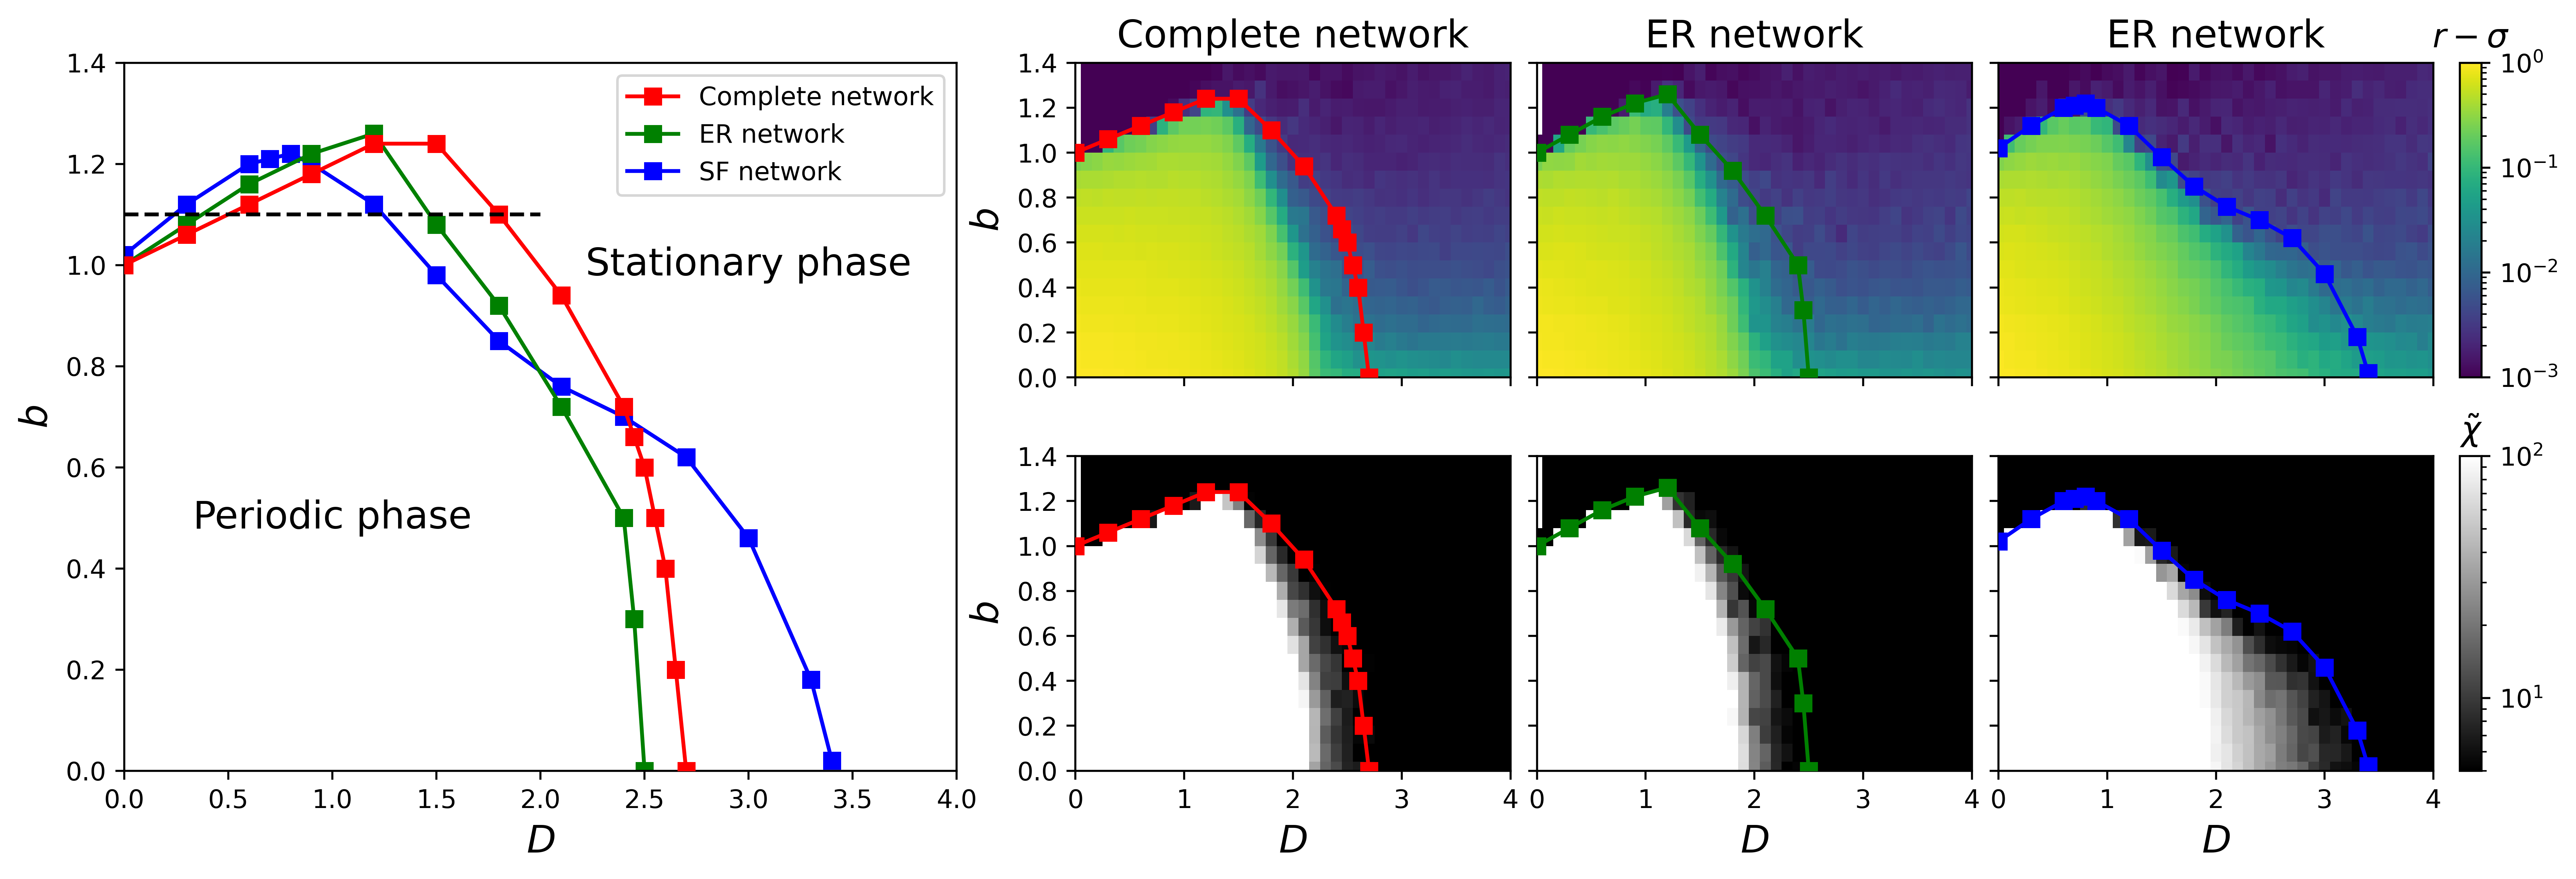

In [7]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.colors as colors

fig = plt.figure(figsize=(15,5),dpi=500)
gs0 = gridspec.GridSpec(1, 2, figure=fig,width_ratios=[3,4])
plt.subplot(gs0[0])
plt.plot(MF['Ds'],MF['bs'],'rs-',label='Complete network',zorder=3)
plt.plot(ER['Ds'],ER['bs'],'gs-',label='ER network',zorder=2)
plt.plot(SF['Ds'],SF['bs'],'bs-',label='SF network',zorder=1)
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.legend()
# plt.grid()
plt.xlabel(r'$D$',fontsize=15)
plt.ylabel(r'$b$',fontsize=15)
plt.text(1.0,0.5,'Periodic phase',fontsize=15,horizontalalignment='center',
        verticalalignment='center')
plt.text(3.0,1.0,'Stationary phase',fontsize=15,horizontalalignment='center',
        verticalalignment='center')
plt.hlines(1.1,0,2,ls='--',color='k',zorder=3)

gs2 = fig.add_gridspec(nrows=2, ncols=4, left=0.47, right=0.98,
                        hspace=0.25,wspace=0.08,width_ratios=[20,20,20,1])

C_rs = fig.add_subplot(gs2[0, 0])
plt.sca(C_rs)
plt.ylabel(r'$b$',fontsize=15)
plt.gca().axes.xaxis.set_ticklabels([])
MF_SR = AR_MF['D_mrij'].T - AR_MF['D_sij'].T
plt.pcolormesh(AR_MF['Ds'],AR_MF['bs'],MF_SR,cmap='viridis',norm=LogNorm(vmin=1e-3, vmax=1))
plt.plot(MF['Ds'],MF['bs'],'rs-',label='Complete graph',zorder=3)
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4],)
plt.title('Complete network',fontsize=15)

C_chi = fig.add_subplot(gs2[1, 0])
plt.sca(C_chi)
plt.ylabel(r'$b$',fontsize=15)
plt.xlabel(r'$D$',fontsize=15)
MF_SR = AR_MF['D_chiij'].T
plt.pcolormesh(AR_MF['Ds'],AR_MF['bs'],MF_SR,cmap='gray',norm=LogNorm(vmin=5, vmax=100))
plt.plot(MF['Ds'],MF['bs'],'rs-',label='Complete graph',zorder=3)
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4],)

M_rs = fig.add_subplot(gs2[0, 1])
plt.sca(M_rs)
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4],)
ER_SR = AR_ER['D_mrij'].T - AR_ER['D_sij'].T
plt.pcolormesh(AR_ER['Ds'],AR_ER['bs'],ER_SR,cmap='viridis',norm=LogNorm(vmin=1e-3, vmax=1))
plt.plot(ER['Ds'],ER['bs'],'gs-',zorder=3)
plt.title('ER network',fontsize=15)


C_chi = fig.add_subplot(gs2[1, 1])
plt.sca(C_chi)
plt.ylabel(r'$b$',fontsize=15)
plt.xlabel(r'$D$',fontsize=15)
# plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
ER_SR = AR_ER['D_chiij'].T
plt.pcolormesh(AR_ER['Ds'],AR_ER['bs'],ER_SR,cmap='gray',norm=LogNorm(vmin=5, vmax=100))
plt.plot(ER['Ds'],ER['bs'],'gs-',zorder=3)
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4],)

S_rs = fig.add_subplot(gs2[0, 2])
plt.sca(S_rs)
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4],)
SF_SR = AR_SF['D_mrij'].T - AR_SF['D_sij'].T
plt.pcolormesh(AR_SF['Ds'],AR_SF['bs'],SF_SR,cmap='viridis',norm=LogNorm(vmin=1e-3, vmax=1))
plt.plot(SF['Ds'],SF['bs'],'bs-',zorder=3)
plt.title('ER network',fontsize=15)


S_chi = fig.add_subplot(gs2[1, 2])
plt.sca(S_chi)
plt.ylabel(r'$b$',fontsize=15)
plt.xlabel(r'$D$',fontsize=15)
# plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
SF_SR = AR_SF['D_chiij'].T
plt.pcolormesh(AR_SF['Ds'],AR_SF['bs'],SF_SR,cmap='gray',norm=LogNorm(vmin=5, vmax=100))
plt.plot(SF['Ds'],SF['bs'],'bs-',zorder=3)
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4],)

cbar_rs = fig.add_subplot(gs2[0, 3])
norm_ER = LogNorm(vmin=1e-3, vmax=1)
cm = plt.cm.viridis
cb1 = mpl.colorbar.ColorbarBase(cbar_rs, cmap=cm, norm=norm_ER, orientation='vertical')
cb1.ax.set_title(r'$r-\sigma$',fontsize=13)

cbar_s = fig.add_subplot(gs2[1, 3])
norm_ER = LogNorm(vmin=5, vmax=100)
cm = plt.cm.gray
cb1 = mpl.colorbar.ColorbarBase(cbar_s, cmap=cm, norm=norm_ER, orientation='vertical')
cb1.ax.set_title(r'$\tilde{\chi}$',fontsize=13)

# plt.subplots_adjust(wspace=0.01)

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,sharey=True,figsize=(4,7),dpi=300)
plt.sca(ax1)
MF_SR = AR_MF['D_mrij'].T - AR_MF['D_sij'].T
plt.pcolormesh(AR_MF['Ds'],AR_MF['bs'],MF_SR,cmap='viridis',norm=LogNorm(vmin=1e-3, vmax=1))
plt.plot(MF['Ds'],MF['bs'],'rs-',label='Complete graph',zorder=3)

plt.xlim(0,4)
plt.ylim(0,1.4)
# plt.xlabel(r'$D$',fontsize=15)
plt.ylabel(r'$b$',fontsize=15)
plt.title(r'$r-\sigma$',fontsize=15)
plt.suptitle('Complete graph',fontsize=15)
plt.gca().set_aspect('auto')

plt.sca(ax2)
MF_SR = AR_MF['D_chiij'].T
plt.pcolormesh(AR_MF['Ds'],AR_MF['bs'],MF_SR,cmap='gray',norm=LogNorm(vmin=5, vmax=100))
plt.plot(MF['Ds'],MF['bs'],'rs-',label='Complete graph',zorder=3)

plt.xlim(0,4)
plt.ylim(0,1.4)
plt.xlabel(r'$D$',fontsize=15)
plt.ylabel(r'$b$',fontsize=15)
plt.title(r'$\tilde{\chi}$',fontsize=15)
plt.gca().set_aspect('auto')

plt.tight_layout()
plt.show()

NameError: name 'AR_MF' is not defined

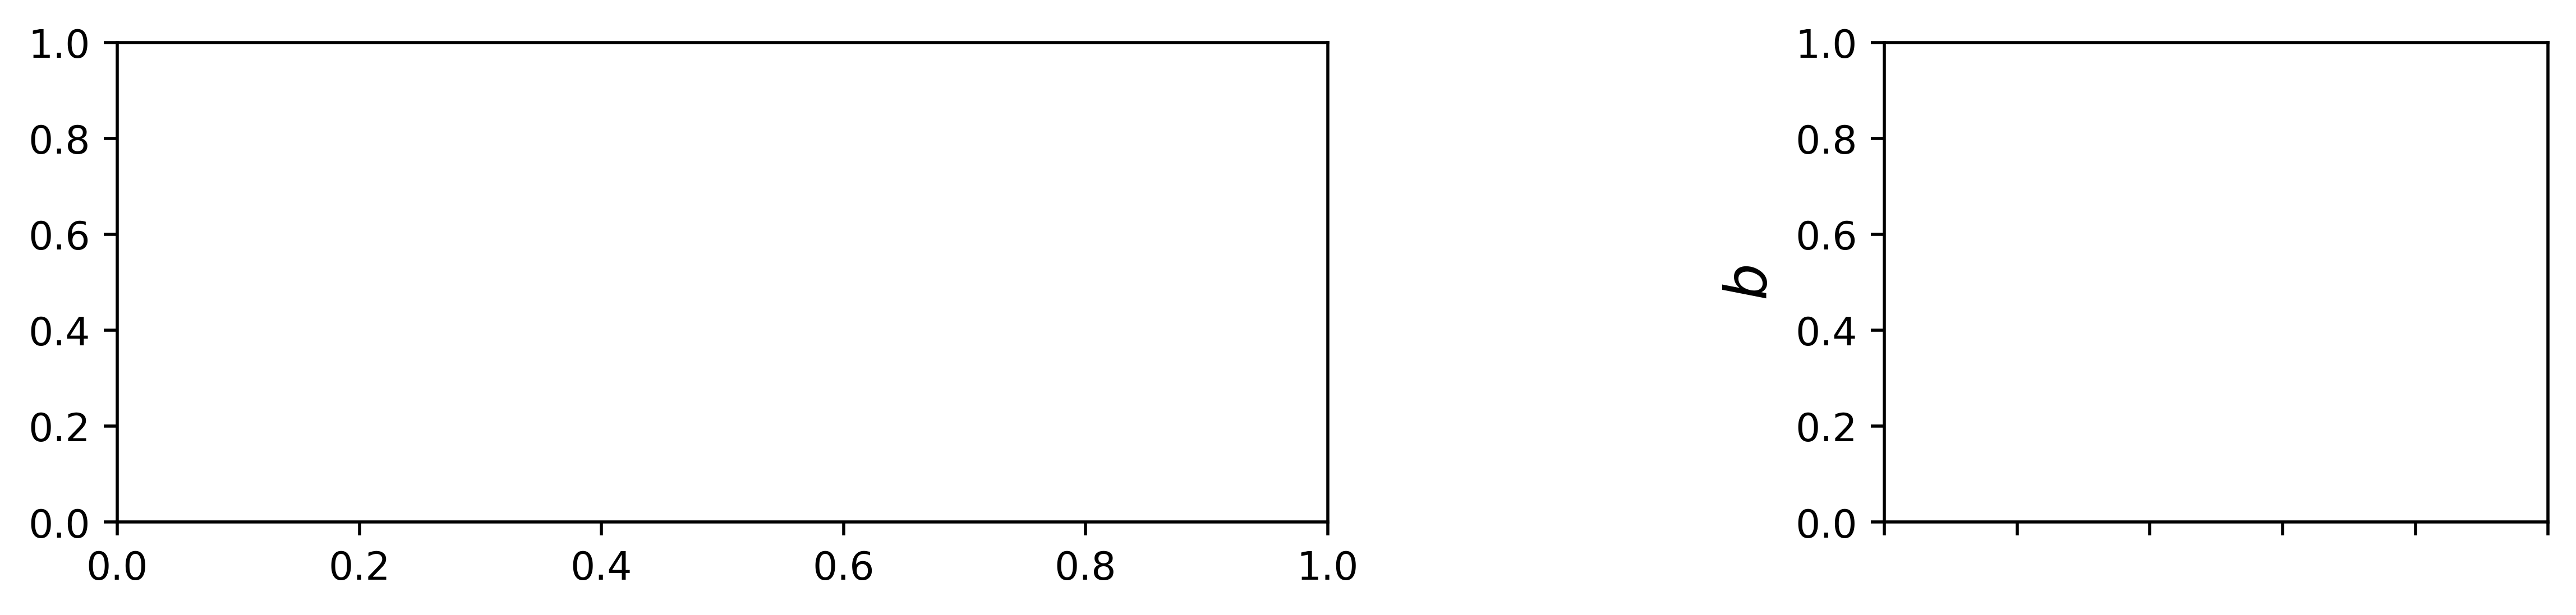

In [4]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.colors as colors

fig = plt.figure(figsize=(15,5),dpi=500)
gs0 = gridspec.GridSpec(1, 2, figure=fig,width_ratios=[3,8])

plt.subplot(gs0[0])


In [ ]:
A = glob.glob('DATA/*_ENSEMBLE dt = 0.1 b = 1.1 0.npz')
plt.figure(figsize=(15,3.5),dpi=500)
NN = ['MF','ER','SF']

Name = {'MF':['Complete network','red'],'ER':['ER network','green'],'SF':['SF network','blue']}
num = 142
leg = []
leg_name = []
for net in NN:
    plt.subplot(141)

    for name in A:
        temp = np.load(name)
        name = name.split('/')[1].split('_')[0]
        if net ==  name:
            p, = plt.plot(temp['Ds'],temp['BCM'],'.-',label=Name[net][0],color=Name[net][1])
            f = plt.fill_between(temp['Ds'],temp['BCM']-temp['BCS'],temp['BCM']+temp['BCS'],color=Name[net][1],alpha=0.3)
            leg.append((p,f))
            leg_name.append(Name[net][0])
            
    for name in A:
        temp = np.load(name)
        name = name.split('/')[1].split('_')[0]
        if net ==  name:
            if num == 142:
                ax2 = plt.subplot(num)
            else:
                plt.subplot(num,sharey=ax2)
            plt.title(Name[net][0],fontsize=15)
            rp, = plt.plot(temp['Ds'],temp['BRM'],'o-',color=Name[net][1],label=r'$r$')
            rf  = plt.fill_between(temp['Ds'],temp['BRM']-temp['BRS'],temp['BRM']+temp['BRS'],color=Name[net][1],alpha=0.3)
            sp, = plt.plot(temp['Ds'],temp['BSM'],'o-',fillstyle='none',c=Name[net][1],label=r'$\sigma$')
            sf  = plt.fill_between(temp['Ds'],temp['BRM']-temp['BRS'],temp['BRM']+temp['BRS'],color=Name[net][1],alpha=0.3)
            plt.legend([(rp,rf),(sp,sf)],[r'$r$',r'$\sigma$'],loc=1)
            # plt.ylim(0,1)
            # plt.xlim(0,2.0)
            plt.xlabel(r'$D$',fontsize=15)

            if num == 142:
                plt.axvline(0.5,color='red',ls='--')
                plt.axvline(1.7,color='red',ls=':')
            if num == 143:
                plt.axvline(0.4,color='green',ls='--')
                plt.axvline(1.5,color='green',ls=':')

            if num == 144:
                plt.axvline(0.3,color='blue',ls='--')
                plt.axvline(1.3,color='blue',ls=':')

            num += 1
# plt.subplot(142)
plt.sca(ax2)
plt.ylabel(r'$r,\sigma$',fontsize=15)

plt.subplot(141)
plt.legend(leg,leg_name)
plt.ylabel(r'$\tilde{\chi}$',fontsize=15)
plt.xlabel(r'$D$',fontsize=15)

# plt.ylim(0,10)
plt.axvline(0.3,color='blue',ls='--')
plt.axvline(0.4,color='green',ls='--')
plt.axvline(0.5,color='red',ls='--')

plt.axvline(1.3,color='blue',ls=':')
plt.axvline(1.5,color='green',ls=':')
plt.axvline(1.7,color='red',ls=':')

b = temp['b']
# plt.suptitle(f'b = {b}')
plt.tight_layout()

In [9]:
N_ER = pickle.load(open('DATA/ER GRAPH/ER.pickle','rb'))
mk = N_ER[0,'mk']
Aij= N_ER[0,'Aij']
G = N_ER[0,'G']

ND= N_ER[0,'D']
Arg_D = np.argsort(ND)

UND_ER = np.unique(ND)
arg_ND_ER = {}
for D_ in UND_ER:
    arg_ND_ER[D_], = np.where(ND==D_)


N_SF = pickle.load(open('DATA/SF GRAPH/SF.pickle','rb'))
mk = N_SF[0,'mk']
Aij= N_SF[0,'Aij']
G = N_SF[0,'G']

ND= N_SF[0,'D']
Arg_D = np.argsort(ND)

UND_SF = np.unique(ND)
arg_ND_SF = {}
for D_ in UND_SF:
    arg_ND_SF[D_], = np.where(ND==D_)

<Figure size 7500x1750 with 0 Axes>

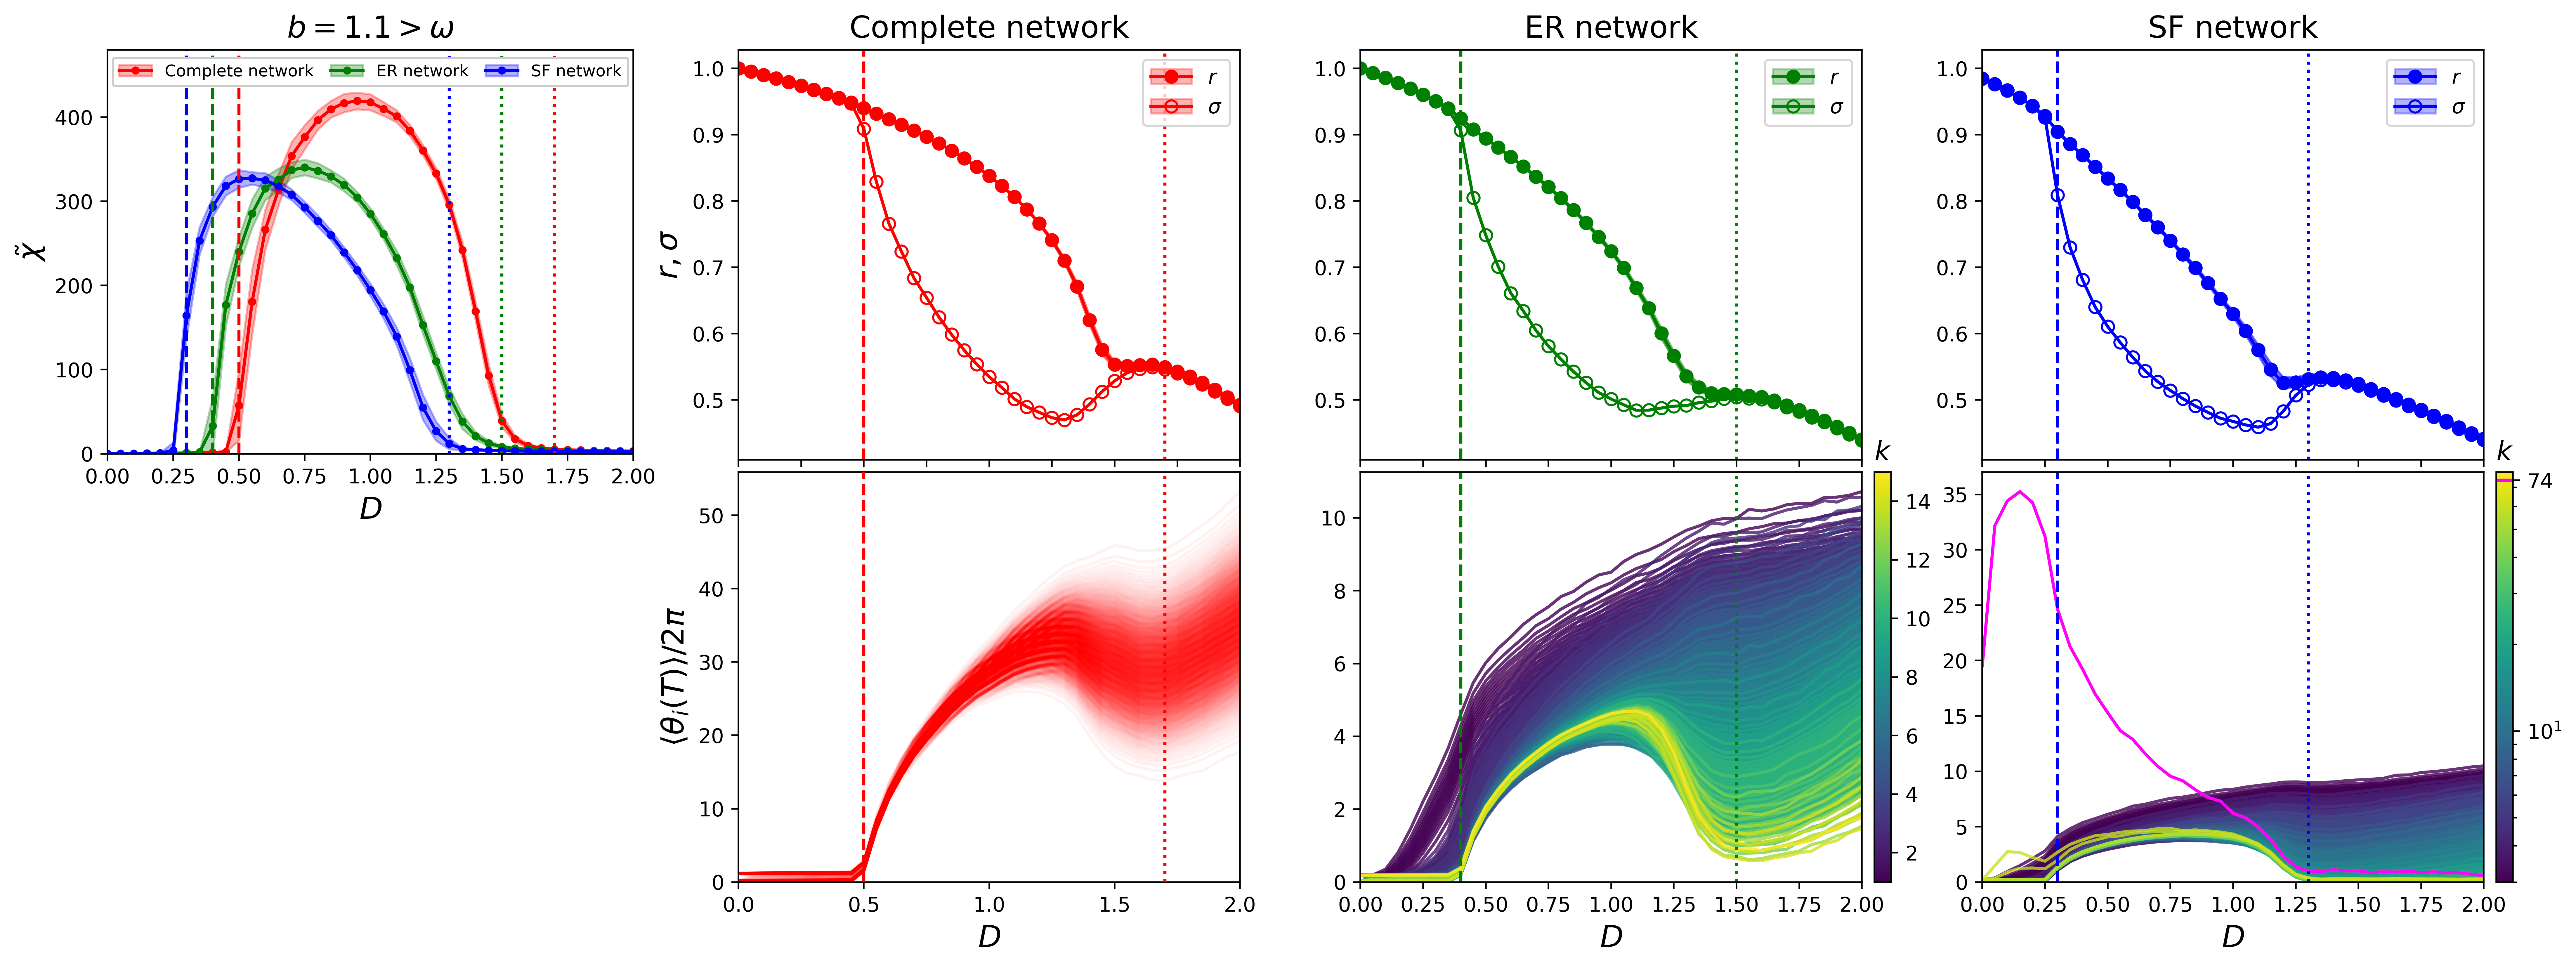

In [14]:
fig = plt.figure(figsize=(18,7.4),dpi=500)
gs1 = gridspec.GridSpec(2, 1)
gs1.update(left=0.05, right=0.25, wspace=0.05,hspace=0.06)
ax1 = plt.subplot(gs1[0, 0])

A = glob.glob('DATA/*_ENSEMBLE dt = 0.1 b = 1.1 0.npz')
plt.figure(figsize=(15,3.5),dpi=500)
NN = ['MF','ER','SF']

Name = {'MF':['Complete network','red'],'ER':['ER network','green'],'SF':['SF network','blue']}
num = 142
leg = []
leg_name = []
for net in NN:
    plt.sca(ax1)

    for name in A:
        temp = np.load(name)
        name = name.split('/')[1].split('_')[0]
        if net ==  name:
            p, = plt.plot(temp['Ds'],temp['BCM'],'.-',label=Name[net][0],color=Name[net][1])
            f = plt.fill_between(temp['Ds'],temp['BCM']-temp['BCS'],temp['BCM']+temp['BCS'],color=Name[net][1],alpha=0.3)
            leg.append((p,f))
            leg_name.append(Name[net][0])

plt.xlim(0,2)
plt.ylim(0,480)

plt.axvline(0.3,color='blue',ls='--')
plt.axvline(0.4,color='green',ls='--')
plt.axvline(0.5,color='red',ls='--')

plt.axvline(1.3,color='blue',ls=':')
plt.axvline(1.5,color='green',ls=':')
plt.axvline(1.7,color='red',ls=':')
plt.ylabel(r'$\tilde{\chi}$',fontsize=15)
plt.xlabel(r'$D$',fontsize=15)
plt.legend(leg,leg_name,bbox_to_anchor=(0.01, 0.91, 0.98, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3,fontsize=8,framealpha=1)
plt.title(r'$b = 1.1 > \omega$',fontsize=15)

#####


gs2 = gridspec.GridSpec(2, 6,width_ratios=[30,1,30,1,30,1])
gs2.update(left=0.29, right=0.98, hspace=0.03)
C_rs = plt.subplot(gs2[0, 0])
plt.ylabel(r'$r,\sigma$',fontsize=15)
E_rs = plt.subplot(gs2[0, 2])
S_rs = plt.subplot(gs2[0, 4])
N_axis = {'MF':C_rs,'ER':E_rs,'SF':S_rs}
N_vline = {'MF':[0.5,1.7],'ER':[0.4,1.5],'SF':[0.3,1.3]}
for net in NN:
    for name in A:
        temp = np.load(name)
        name = name.split('/')[1].split('_')[0]
        if net ==  name:
            ax = N_axis[name]
            plt.sca(N_axis[name])
            if net != 'MF':
                ax.sharex(N_axis['MF'])
                ax.sharey(N_axis['MF'])
                plt.gca().axes.xaxis.set_ticklabels([])
            plt.title(Name[net][0],fontsize=15)
            rp, = plt.plot(temp['Ds'],temp['BRM'],'o-',color=Name[net][1],label=r'$r$')
            rf  = plt.fill_between(temp['Ds'],temp['BRM']-temp['BRS'],temp['BRM']+temp['BRS'],color=Name[net][1],alpha=0.3)
            sp, = plt.plot(temp['Ds'],temp['BSM'],'o-',fillstyle='none',c=Name[net][1],label=r'$\sigma$')
            sf  = plt.fill_between(temp['Ds'],temp['BRM']-temp['BRS'],temp['BRM']+temp['BRS'],color=Name[net][1],alpha=0.3)
            plt.legend([(rp,rf),(sp,sf)],[r'$r$',r'$\sigma$'],loc=1)
            # plt.ylim(0,1)
            plt.xlim(0,2.0)
            plt.xlabel(r'$D$',fontsize=15)
            plt.axvline(N_vline[name][0],color=Name[net][1],ls='--')
            plt.axvline(N_vline[name][1],color=Name[net][1],ls=':')
        

C_T = plt.subplot(gs2[1, 0])
plt.ylabel(r'$r,\sigma$',fontsize=15)
E_T = plt.subplot(gs2[1, 2])
E_cbar = plt.subplot(gs2[1, 3])
S_T = plt.subplot(gs2[1, 4])
S_cbar = plt.subplot(gs2[1, 5])

N_axis = {'MF':C_T,'ER':E_T,'SF':S_T}

plt.sca(C_T)
Data = np.load('DATA/MF Rotation 100.npz')
B_T = Data['B_T']
Ds = Data['Ds']

T_E = np.array(B_T[:100])
T_ES = np.sort(T_E,axis=2)/(np.pi*2)
T_EM = np.mean(T_ES,axis=0)
plt.plot(Ds,T_EM,color='red',alpha=0.05,zorder=-1)
# plt.plot(Ds,T_EMM,'r.-')
# plt.fill_between(Ds,T_EMM-T_EMS,T_EMM+T_EMS,alpha=0.7,zorder=3)
plt.axvline(0.5,color='red',ls='--',zorder=3)
plt.axvline(1.7,color='red',ls=':',zorder=3)
plt.xticks([0,0.5,1,1.5,2])
plt.xlim(0,2)
plt.ylim(0,)
# plt.title('Complete network',fontsize=18)
plt.ylabel(r'$\langle\theta_i(T)\rangle/2\pi$',fontsize=15)
plt.xlabel(r'$D$',fontsize=15)

Data = np.load('DATA/ER Rotation 100.npz')
B_T = Data['B_T']
Ds = Data['Ds']
plt.sca(E_T)
norm_ER = plt.Normalize(vmin=np.min(UND_ER),vmax=np.max(UND_ER))
cm = plt.cm.viridis
for D_ in UND_ER:
    B_TN = B_T[:,:,arg_ND_ER[D_]]/(np.pi*2)
    B_TN = np.sort(B_TN,axis=2)/(np.pi*2)
    B_TNM = np.mean(B_TN,axis=0)
    B_TNS = np.std(B_TN,axis=0)
    plt.plot(Ds,B_TNM,color=cm(norm_ER(D_)),alpha=0.8)

plt.axvline(0.4,color='green',ls='--')
plt.axvline(1.5,color='green',ls=':')

# plt.ylabel(r'$\langle\theta_i(T)\rangle/2\pi$',fontsize=15)
plt.xlabel(r'$D$',fontsize=15)
plt.ylim(0,)
plt.xlim(0,2)
cb1 = mpl.colorbar.ColorbarBase(E_cbar, cmap=cm, norm=norm_ER, orientation='vertical')
cb1.ax.set_title(r'$k$',fontsize=13)

pos = E_cbar.get_position()
new_pos = [pos.x0 - 0.015, pos.y0, pos.width, pos.height]
E_cbar.set_position(new_pos)


Data = np.load('DATA/SF Rotation 100.npz')
B_T = Data['B_T']
Ds = Data['Ds']
plt.sca(S_T)
norm_SF = colors.LogNorm(vmin=np.min(UND_SF),vmax=np.max(UND_SF)+5)
cm = plt.cm.viridis
cm_r = plt.cm.viridis_r
for D_ in UND_SF:
    B_TN = B_T[:,:,arg_ND_SF[D_]]/(np.pi*2)
    B_TN = np.sort(B_TN,axis=2)/(np.pi*2)
    B_TNM = np.mean(B_TN,axis=0)
    B_TNS = np.std(B_TN,axis=0)
    plt.plot(Ds,B_TNM,color=cm(norm_SF(D_)),alpha=0.8)

D_ = UND_SF[-1]
B_TN = B_T[:,:,arg_ND_SF[D_]]/(np.pi*2)
B_TN = np.sort(B_TN,axis=2)/(np.pi*2)
B_TNM = np.mean(B_TN,axis=0)
plt.plot(Ds,B_TNM,color='magenta',alpha=1)

plt.axvline(0.3,color='blue',ls='--')
plt.axvline(1.3,color='blue',ls=':')
plt.xlabel(r'$D$',fontsize=15)
plt.ylim(0,)
plt.xlim(0,2)

cb1 = mpl.colorbar.ColorbarBase(S_cbar, cmap=cm, norm=norm_SF, orientation='vertical')
cb1.ax.set_title(r'$k$',fontsize=13)
cb1.ax.axhline(D_,color='magenta')
cb1.ax.set_yticks([10,D_],[r'$10^1$',f'{D_}'])

pos = S_cbar.get_position()
new_pos = [pos.x0 - 0.015, pos.y0, pos.width, pos.height]
S_cbar.set_position(new_pos)


# ax5 = plt.subplot(gs2[:-1, -1])
# ax6 = plt.subplot(gs2[-1, -1])  

In [96]:
name

'ER'